# Problem Statement
Project Introduction : 
The Indian education landscape has been undergoing rapid changes for the past 10 years owing to
the advancement of web-based learning services, specifically, eLearning platforms.
Global E-learning is estimated to witness an 8X over the next 5 years to reach USD 2B in 2021. India
is expected to grow with a CAGR of 44% crossing the 10M users mark in 2021. Although the market
is growing on a rapid scale, there are major challenges associated with digital learning when
compared with brick and mortar classrooms. One of many challenges is how to ensure quality
learning for students. Digital platforms might overpower physical classrooms in terms of content
quality but when it comes to understanding whether students are able to grasp the content in a live
class scenario is yet an open-end challenge.
In a physical classroom during a lecturing teacher can see the faces and assess the emotion of the
class and tune their lecture accordingly, whether he is going fast or slow. He can identify students who
need special attention. Digital classrooms are conducted via video telephony software program (exZoom) where it’s not possible for medium scale class (25-50) to see all students and access the
mood. Because of this drawback, students are not focusing on content due to lack of surveillance.
While digital platforms have limitations in terms of physical surveillance but it comes with the power of
data and machines which can work for you. It provides data in the form of video, audio, and texts
which can be analysed using deep learning algorithms. Deep learning backed system not only solves
the surveillance issue, but it also removes the human bias from the system, and all information is no
longer in the teacher’s brain rather translated in numbers that can be analysed and tracked.


We will solve the above-mentioned challenge by applying deep learning algorithms to live video data.
The solution to this problem is by recognizing facial emotions.
## Face Emotion Recognition
This is a few shot learning live face emotion detection system. The model should be able to real-time
identify the emotions of students in a live class.

In [9]:
#importing important libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

# Displaying Images


In [27]:
#taking inputs images for training
picture_size = 48

folder_path = os.getcwd() + "\images\\"
print(folder_path)

c:\Users\joshr\Documents\GitHub\CS-4641-Project\testingFolder\images\


c:\Users\joshr\Documents\GitHub\CS-4641-Project\testingFolder\images\train\disgust\
c:\Users\joshr\Documents\GitHub\CS-4641-Project\testingFolder\images\train\disgust\
c:\Users\joshr\Documents\GitHub\CS-4641-Project\testingFolder\images\train\disgust\
c:\Users\joshr\Documents\GitHub\CS-4641-Project\testingFolder\images\train\disgust\
c:\Users\joshr\Documents\GitHub\CS-4641-Project\testingFolder\images\train\disgust\
c:\Users\joshr\Documents\GitHub\CS-4641-Project\testingFolder\images\train\disgust\
c:\Users\joshr\Documents\GitHub\CS-4641-Project\testingFolder\images\train\disgust\
c:\Users\joshr\Documents\GitHub\CS-4641-Project\testingFolder\images\train\disgust\
c:\Users\joshr\Documents\GitHub\CS-4641-Project\testingFolder\images\train\disgust\


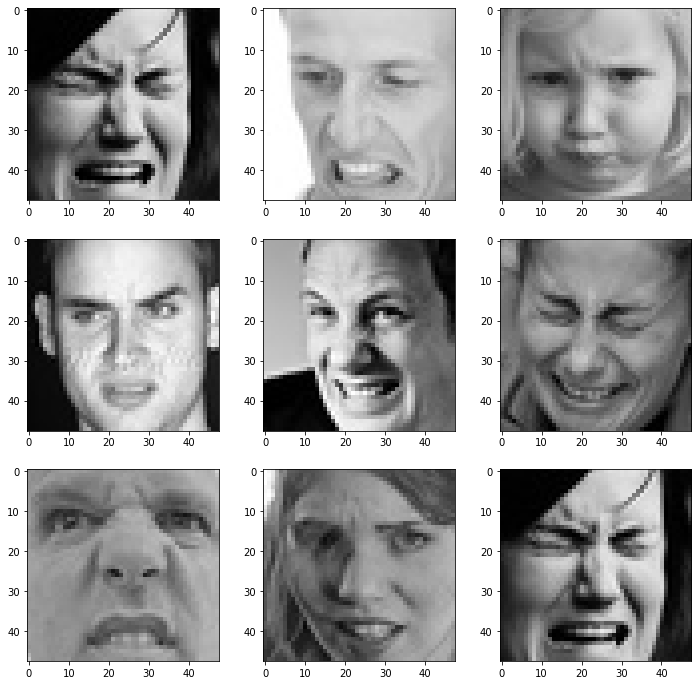

In [29]:
#checking disgust image
expression = 'disgust'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)

    print(folder_path+"train\\"+expression+"\\")

    img = load_img(folder_path+"train\\"+expression+"\\"+
                  os.listdir(folder_path + "train\\" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

# Making Training and Validation Data


In [30]:
#splitting data into train, test and validation set
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


# Model Building


* Model = sequential : A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

* Activation = relu :The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero. It has become the default activation function for many types of neural networks because a model that uses it is easier to train and often achieves better performance.

* padding = The padding parameter of the Keras Conv2D class can take one of two values: 'valid' or 'same'.
Setting the value to “valid” parameter means that the input volume is not zero-padded and the spatial dimensions are allowed to reduce via the natural application of convolution.

* Maxpooling = Maximum pooling, or max pooling, is a pooling operation that calculates the maximum, or largest, value in each patch of each feature map. The results are down sampled or pooled feature maps that highlight the most present feature in the patch, not the average presence of the feature in the case of average pooling.

* Batch normalization = Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.

* Dropout = Dropout is a technique used to prevent a model from overfitting. Dropout works by randomly setting the outgoing edges of hidden units (neurons that make up hidden layers) to 0 at each update of the training phase.

* Adam = Adam can be looked at as a combination of RMSprop and Stochastic Gradient Descent with momentum. It uses the squared gradients to scale the learning rate like RMSprop and it takes advantage of momentum by using moving average of the gradient instead of gradient itself like SGD with momentum.

* SGD = Stochastic Gradient Descent (SGD) addresses both of these issues by following the negative gradient of the objective after seeing only a single or a few training examples. The use of SGD In the neural network setting is motivated by the high cost of running back propagation over the full training set

* RMSprop = RMSprop is a gradient based optimization technique used in training neural networks. ... This normalization balances the step size (momentum), decreasing the step for large gradients to avoid exploding, and increasing the step for small gradients to avoid vanishing.

In [31]:
#building model with 7 classes
from keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

C:\Users\joshr\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


# Visualize model

The plot_model() function in Keras will create a plot of your network. This function takes a few useful arguments:

* model: (required) The model that you wish to plot.
* to_file: (required) The name of the file to which to save the plot.
* show_shapes: (optional, defaults to False) Whether or not to show the output shapes of each layer.
* show_layer_names: (optional, defaults to True) Whether or not to show the name for each lay

In [32]:
#visualizing the model
import tensorflow as tf
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


# Fitting the Model with Training and Validation Data


In [33]:
#importing tensorflow library and package
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
#Stopping training when a monitored metric has stopped improving.
early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 50

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [34]:
#fitting model with 48 epoch
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/50


C:\Users\joshr\AppData\Local\Temp/ipykernel_1312/2587516832.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set,


225/225 [==============================] - 293s 1s/step - loss: 1.7852 - accuracy: 0.3159 - val_loss: 1.7916 - val_accuracy: 0.3513 - lr: 0.0010
Epoch 2/50
225/225 [==============================] - 305s 1s/step - loss: 1.4492 - accuracy: 0.4435 - val_loss: 1.7174 - val_accuracy: 0.3656 - lr: 0.0010
Epoch 3/50
225/225 [==============================] - 314s 1s/step - loss: 1.2821 - accuracy: 0.5079 - val_loss: 1.2708 - val_accuracy: 0.5166 - lr: 0.0010
Epoch 4/50
225/225 [==============================] - 315s 1s/step - loss: 1.1946 - accuracy: 0.5446 - val_loss: 1.1934 - val_accuracy: 0.5507 - lr: 0.0010
Epoch 5/50
225/225 [==============================] - 298s 1s/step - loss: 1.1347 - accuracy: 0.5676 - val_loss: 1.1440 - val_accuracy: 0.5634 - lr: 0.0010
Epoch 6/50
225/225 [==============================] - 291s 1s/step - loss: 1.0818 - accuracy: 0.5897 - val_loss: 1.2814 - val_accuracy: 0.5455 - lr: 0.0010
Epoch 7/50
225/225 [==============================] - 285s 1s/step - loss: 

# Plotting Accuracy & Loss


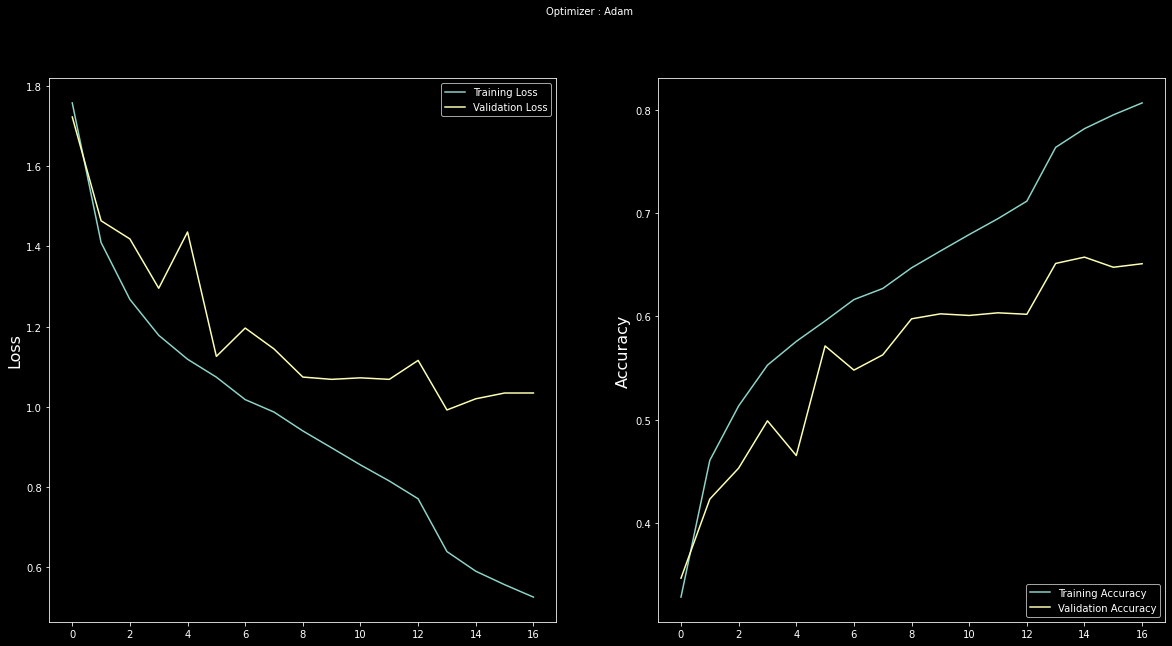

In [18]:
#plotting graph to check accuracy and loss
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()